# Visualize cell results

Requires trained and evaluated models on cell data.

In [1]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

from unot.plotting.setup import setup_plt
setup_plt()

In [2]:
DRUGS = [
        "cisplatin",
        "crizotinib",
        "dabrafenib",
        "dacarbazine",
        "dasatinib",
        "decitabine",
        "dexamethasone",
        "erlotinib",
        "everolimus",
        "hydroxyurea",
        "imatinib",
        "ixazomib",
        "lenalidomide",
        "melphalan",
        "midostaurin",
        "mln",
        "olaparib",
        "paclitaxel",
        "palbociclib",
        "panobinostat",
        "regorafenib",
        "sorafenib",
        "staurosporine",
        "temozolomide",
        "trametinib",
        "ulixertinib",
        "vindesine",
    ]

In [17]:
# create the dataframes containing evaluation metrics
results = pd.DataFrame(columns=["drug", "model", "exp_name",  "data", "l2DS", "enrichment-k50", "enrichment-k100", "mmd", "total_cost", "avg_cost"])
results_w = pd.DataFrame(columns=["drug", "model", "exp_name",  "data", "mmd_w", "mmd_w_rs", "weights_mean", "weights_std", "total_cost_w", "avg_cost_w"])

# specify the directory where the results are stored 
outroot = Path("../../unot/results/rebuttal/rebuttal/0922_submission")

for drug in os.listdir(outroot):
    if drug in DRUGS:
        outdir = outroot / drug
        if outdir.is_dir():
            for data in os.listdir(outdir):
                if data in ["8h_subm", "24h_subm"]:
                    e = outdir / data
                    if e.is_dir():
                        for exp_name in os.listdir(outdir / data):
                            if exp_name in [
                                "cellot_same_bs", 
                                "gan_base",
                                "submission_base", 
                                "naive",
                                "discrete",
                                "gaussian_approx",
                                "gaussian_approx_unb",
                            ]:
                                d = outdir / data / exp_name
                                for model_name in os.listdir(d):
                                    if model_name.startswith("model-"):
                                        model_dir = Path(d / model_name / "evals_iid_data_space")
                                        p = model_dir / "evals.csv"

                                        if os.path.exists(p):
                                            row = pd.read_csv(p, header=None).set_index(0).T
                                            row["drug"]=drug
                                            if data.endswith("_rebuttal"):
                                                data = data.replace("_rebuttal", "")
                                                model_name = model_name + "_norm"
                                            if exp_name == "gaussian_approx_unb":
                                                model_name = "model-gaussian-unb"
                                            row["model"] = model_name
                                            if data == "8h":
                                                exp_name = exp_name + "_old_data"
                                            row["exp_name"] = exp_name
                                            row["data"] = data
                                            results = results.append(row, ignore_index=True)

                                        p = model_dir / "evals_weights.csv"
                                        if os.path.exists(p):
                                            row = pd.read_csv(p, header=None).set_index(0).T
                                            row["drug"]=drug
                                            row["model"] = model_name
                                            row["exp_name"] = exp_name
                                            row["data"] = data
                                            results_w = results_w.append(row, ignore_index=True)

In [18]:
results[results["drug"] == "dasatinib"].head()

,drug,model,exp_name,data,l2DS,enrichment-k50,enrichment-k100,mmd,total_cost,avg_cost,w2_1_0.95,w2_1_1.0,w2_2_0.95,w2_2_1.0,w2_3_0.95,w2_3_1.0,w2_4_0.95,w2_4_1.0,w2_5_0.95,w2_5_1.0
54,dasatinib,model-ot,discrete,8h_subm,0.403510,0.742844,0.706222,0.017414,2384.8300,1.084507,0.436398,0.699632,0.433634,0.599755,0.438097,0.562430,0.437816,0.539242,0.433335,0.520152
55,dasatinib,model-ubot,discrete,8h_subm,0.551938,0.982222,0.970844,0.198819,3661.0327,1.664862,1.406687,2.016159,1.420200,1.784881,1.376475,1.635498,1.315693,1.516948,1.251207,1.416408
56,dasatinib,model-identity,naive,8h_subm,0.732355,0.666133,0.629644,0.028398,0.0000,0.000000,1.203622,1.543081,1.163939,1.399220,1.149684,1.330982,1.129345,1.278552,1.103740,1.231403
57,dasatinib,model-control,naive,8h_subm,0.043073,0.508731,0.506535,0.000423,17434.7580,7.928494,0.030739,0.043173,0.010540,0.018130,0.007301,0.011518,0.005643,0.008766,0.004971,0.007283
58,dasatinib,model-gaussian,gaussian_approx,8h_subm,0.130394,0.579111,0.543133,0.006839,2430.7988,1.105411,0.322157,0.359428,0.200766,0.232350,0.153214,0.180422,0.125067,0.149957,0.105568,0.128672


In [19]:
results_w.head()

,drug,model,exp_name,data,mmd_w,mmd_w_rs,weights_mean,weights_std,total_cost_w,avg_cost_w,...,w2_w_3_1.0,w2_w_rs_3_1.0,w2_w_4_0.95,w2_w_rs_4_0.95,w2_w_4_1.0,w2_w_rs_4_1.0,w2_w_5_0.95,w2_w_rs_5_0.95,w2_w_5_1.0,w2_w_rs_5_1.0
0,imatinib,model-nubot_v1,submission_base,8h_subm,0.002366,0.002920,0.981468,0.147375,1702.912788,0.774403,...,0.048126,0.066627,0.021705,0.034338,0.034287,0.040191,0.011672,0.028151,0.025468,0.029128
1,imatinib,model-gan,gan_base,8h_subm,0.002579,0.003090,0.919683,0.261600,1371.225363,0.623568,...,0.053067,0.055152,0.009126,0.033623,0.039517,0.039629,-0.004370,0.020686,0.030640,0.030341
2,imatinib,model-nubot_v1,submission_base,24h_subm,0.002468,0.002813,0.986100,0.100165,2137.849618,0.774303,...,0.096200,0.070717,0.060143,0.048252,0.074300,0.087564,0.047736,0.049738,0.061792,0.045187
3,imatinib,model-gan,gan_base,24h_subm,0.006475,0.006740,0.980900,0.233805,1872.846419,0.678322,...,0.174949,0.132112,0.118569,0.125811,0.152537,0.136898,0.103982,0.090381,0.138990,0.083267
4,erlotinib,model-nubot_v1,submission_base,8h_subm,0.002392,0.003053,0.982106,0.080083,356.289903,0.162024,...,0.040953,0.044441,0.026493,0.027022,0.031771,0.018883,0.020724,0.020791,0.026869,0.032443


In [20]:
path = outroot / Path("evals_summary.csv")
results.to_csv(path)

path = outroot / Path("evals_weights_summary.csv")
results_w.to_csv(path)

# Visualize Results

In [21]:
# join un-weighted and weighted results
rv = results.set_index(["drug", "model", "exp_name", "data"]).join(results_w.set_index(["drug", "model", "exp_name", "data"]))
rv = rv.reset_index()
rv.drug = rv.drug.str.capitalize()

In [22]:
# replace weighted metrics by un-weighted if they don't exist (i.e., for balanced models)
replace_dict = {}
for w2_col in rv.filter(regex="w2").columns:
    if "_w" not in w2_col:
        replace_dict["w2_" + "w_" + w2_col.split("w2_")[-1]] = rv[w2_col]
        replace_dict["w2_" + "w_rs_" + w2_col.split("w2_")[-1]] = rv[w2_col]
replace_dict["mmd_w"] = rv["mmd"]
replace_dict["avg_cost_w"] = rv["avg_cost"]
rv = rv.fillna(replace_dict)

In [23]:
rv.head()

,drug,model,exp_name,data,l2DS,enrichment-k50,enrichment-k100,mmd,total_cost,avg_cost,...,w2_w_3_1.0,w2_w_rs_3_1.0,w2_w_4_0.95,w2_w_rs_4_0.95,w2_w_4_1.0,w2_w_rs_4_1.0,w2_w_5_0.95,w2_w_rs_5_0.95,w2_w_5_1.0,w2_w_rs_5_1.0
0,Imatinib,model-ot,discrete,8h_subm,0.124991,0.729602,0.690455,0.010318,2334.4775,1.061609,...,0.069353,0.069353,0.048254,0.048254,0.057980,0.057980,0.041708,0.041708,0.051309,0.051309
1,Imatinib,model-ubot,discrete,8h_subm,0.210154,0.991309,0.985199,0.176297,4073.0780,1.852241,...,0.437189,0.437189,0.335298,0.335298,0.367475,0.367475,0.289410,0.289410,0.316424,0.316424
2,Imatinib,model-identity,naive,8h_subm,0.783721,0.702429,0.657495,0.039390,0.0000,0.000000,...,0.728291,0.728291,0.684850,0.684850,0.708128,0.708128,0.673846,0.673846,0.694211,0.694211
3,Imatinib,model-control,naive,8h_subm,0.043854,0.504602,0.500737,0.000454,13218.9760,6.011358,...,0.006597,0.006597,0.006921,0.006921,0.004866,0.004866,0.006080,0.006080,0.003973,0.003973
4,Imatinib,model-gaussian,gaussian_approx,8h_subm,0.057399,0.569374,0.542467,0.002834,1741.5596,0.791978,...,0.052818,0.052818,0.029793,0.029793,0.038023,0.038023,0.020536,0.020536,0.028360,0.028360


In [24]:
# replace names
rv["model"] = rv["model"].replace(
    {
        "model-nubot_v1": "NubOT",
        "model-cellot": "CellOT",
        "model-gan": "ubOT GAN",
        "model-identity": "Identity",
        "model-control": "Observed",
        "model-ot": "Discrete OT",
        "model-gaussian": "Gaussian Approx",
        "model-gaussian-unb": "Gaussian Approx Unb",
        "model-ubot": "Discrete UBOT",
        "model-nubot_v1_norm": "NubOT_norm",
    }
)

In [25]:
palette_big = [
        "#1A254B",
        "#114083",
        "#386cb5",
        "#A7BED3", 
        "#c3cdd6",
        "#cccccc", 
        "#d1bebe",
        "#e08285", 
        "#F2545B", 
        "#A4243B",
        "#8c0e25",
        "#141d3d",
    ]
palette=["#F2545B", "#A7BED3", "#316594", "#cccccc", "#b0aeae", "#C4B5D0","#966EA7", "#8c0e25"]

In [26]:
# available hyperparameters for w2-distance
rv.filter(regex="w2_w_").columns

Index(['w2_w_1_0.95', 'w2_w_rs_1_0.95', 'w2_w_1_1.0', 'w2_w_rs_1_1.0',
       'w2_w_2_0.95', 'w2_w_rs_2_0.95', 'w2_w_2_1.0', 'w2_w_rs_2_1.0',
       'w2_w_3_0.95', 'w2_w_rs_3_0.95', 'w2_w_3_1.0', 'w2_w_rs_3_1.0',
       'w2_w_4_0.95', 'w2_w_rs_4_0.95', 'w2_w_4_1.0', 'w2_w_rs_4_1.0',
       'w2_w_5_0.95', 'w2_w_rs_5_0.95', 'w2_w_5_1.0', 'w2_w_rs_5_1.0'],
      dtype='object')

In [27]:
# fix negative values

#rv[(rv["model"] == "NubOT") & (rv["drug"] == "Panobinostat")].loc[:,"w2_w_5_0.95"] = rv[(rv["model"] == "NubOT") & (rv["drug"] == "Panobinostat")].loc[:,"w2_w_5_0.95"]
#rv.loc[95,"w2_w_5_0.95"] = rv.loc[95,"w2_w_2_0.95"]
#rv.loc[6,"w2_w_5_0.95"] = rv.loc[6,"w2_w_4_0.95"]
#rv.loc[84,"w2_w_5_0.95"] = rv.loc[84,"w2_w_4_0.95"]
#rv.loc[120,"w2_w_5_0.95"] = rv.loc[120,"w2_w_4_0.95"]
#rv.loc[354,"w2_w_5_0.95"] = rv.loc[354,"w2_w_4_0.95"]
#rv.loc[444,"w2_w_5_0.95"] = rv.loc[444,"w2_w_4_0.95"]

<Figure size 1440x259.2 with 0 Axes>

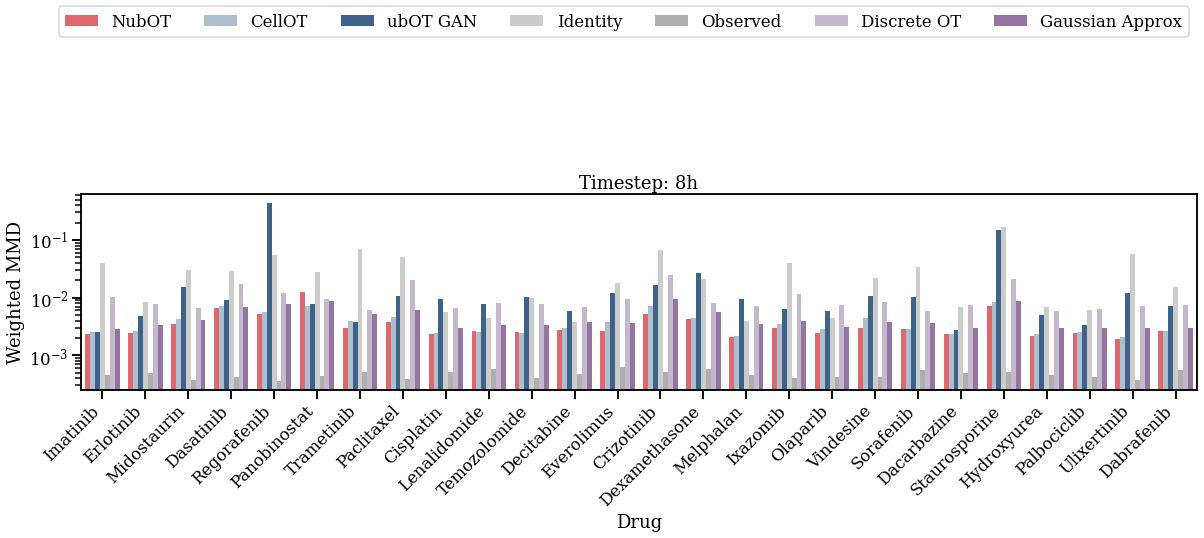

In [32]:
plt.figure(figsize=(20,3.6))

#plt.rcParams["font.size"] = 11
sns.set_context(context='talk', font_scale=1.0)

labels = {"mmd_w": "Weighted MMD", "w2_w": "Weighted Wasserstein Distance"}

sb = rv
# sb = sb[sb["drug"] != "panobinostat"]
timestep = "8h_subm"

if True:
    plt.figure(figsize=(20,3.6))

    # specify which metric to plot
    # metric = "w2_w_1_1.0"
    # metric = "w2_w_5_0.95"
    metric = "mmd_w"
    
    log = True
    sb = sb[sb["data"] == timestep]
    hue_order=["NubOT", "CellOT", "ubOT GAN", "Identity", "Observed", "Discrete OT", "Gaussian Approx"]#, "Gaussian Approx Unb"]
    g = sns.barplot(data=sb, y=metric, x="drug", hue="model", palette=palette, hue_order=hue_order, log=log)
    plt.xticks(rotation=45, ha="right")
    if metric in labels.keys():
        label = labels[metric]
    else:
        label = metric
    plt.legend(bbox_to_anchor=(1, 2), ncol=int(len(hue_order)))
    
    if metric == "w2_w_5_0.95":
        label = "Weighted Wasserstein Distance"
    g.set(ylabel=label, xlabel="Drug")
    t = timestep.replace("_subm", "")
    plt.title(f"Timestep: {t}")
    
    m = metric.replace(".", "-")
    # plt.savefig(f"{timestep}_{m}_COMPLETE.pdf", bbox_inches="tight", format="pdf")
    plt.show()